In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #image library

In [3]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

# cache_dir indicates where to download data. I specified . which means current directory
# untar=True will unzip it

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
# let's look at just roses

roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [8]:
len(roses)

641

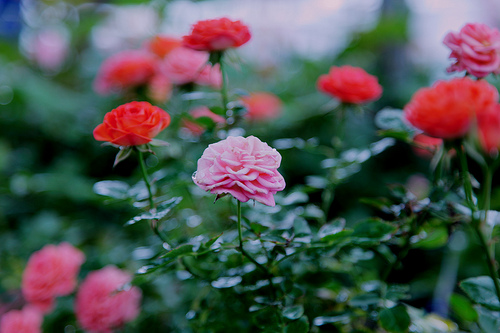

In [8]:
# lets show some pictures using PIL library

PIL.Image.open(str(roses[1]))

In [9]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflower' : list(data_dir.glob('sunflower/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflower' : 3,
    'tulips' : 4
}

In [11]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg')

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [13]:
# opencv (which is cv2) reads an image from disk and converts it to 3-dimentional numpy array

img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

In [14]:
img.shape

(243, 500, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
## put pictures to x, their labels to y

X , y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [19]:
## Normalization or scaling

X_train_scaled = X_train
X_test_scaled = X_test

In [20]:
num_classes = 5

model = Sequential([
    
    # convolutional layers
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    # dense layers
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

2023-03-11 17:43:16.836360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [43]:
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
70/70 [==============================] - 50s 698ms/step - loss: 1.2011 - accuracy: 0.4601
Epoch 2/10
70/70 [==============================] - 50s 719ms/step - loss: 0.8621 - accuracy: 0.6477
Epoch 3/10
70/70 [==============================] - 45s 637ms/step - loss: 0.7107 - accuracy: 0.7141
Epoch 4/10
70/70 [==============================] - 48s 680ms/step - loss: 0.5175 - accuracy: 0.8101
Epoch 5/10
70/70 [==============================] - 54s 771ms/step - loss: 0.3481 - accuracy: 0.8770
Epoch 6/10
70/70 [==============================] - 41s 584ms/step - loss: 0.2017 - accuracy: 0.9322
Epoch 7/10
70/70 [==============================] - 41s 583ms/step - loss: 0.1277 - accuracy: 0.9645
Epoch 8/10
70/70 [==============================] - 43s 613ms/step - loss: 0.1120 - accuracy: 0.9650
Epoch 9/10
70/70 [==============================] - 45s 638ms/step - loss: 0.0397 - accuracy: 0.9906
Epoch 10/10
70/70 [==============================] - 47s 673ms/step - loss: 0.0190 - accura

In [45]:
model.evaluate(X_test_scaled, y_test)

# here we can see an example of overfiting: training set has almost 100% accuracy, while test set - only ~65%

24/24 [==============================] - 4s 155ms/step - loss: 1.8177 - accuracy: 0.6581


[1.817730188369751, 0.6581426858901978]

In [22]:
img_height = X_train_scaled[0].shape[1]
img_width = X_train_scaled[0].shape[2]

In [23]:
## requires TF version 2.8.3 or less at the moment of file creation

data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape = (img_height,img_width,3)),
    tf.keras.layers.RandomZoom(0.1, 0.5)
    tf.keras.layers.RandomRotation(0.1),
])

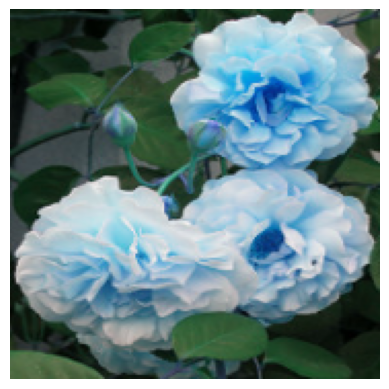

In [24]:
plt.axis('off')
plt.imshow(X[5])

In [ ]:
## requires TF version 2.8.3 or less at the moment of file creation
data_augmentation(X)[0]

In [ ]:
## requires TF version 2.8.3 or less at the moment of file creation
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8')) 

In [ ]:
## requires TF version 2.8.3 or less at the moment of file creation
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train_scaled, y_train, epochs = 10)

In [ ]:
model.evaluate(x_test_scaled, y_test)